# **Universidad Pontificia Bolivariana**
Facultad de ingenierías. \
Ingeniería en Sistemas e Informática.\
Curso de Inteligencia Artificial.\
Periodo 202520.

# Examen No. 3 - CLASIFICACIÓN
Dataset: Calidad del Vino Rojo\
Comparación de algoritmos: \
LogisticRegression \
Random Forest\
Support Vector Machine (SVM)

### **Resumen de las acciones a realizar**

- Carga y Exploración inicial
- EDA
- Preprocesamiento de datos
- Implementación y Entrenamiento de modelos
- Evaluación de métricas

#### **Importación de librerías**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import time
from math import pi

print("Librerías importadas exitosamente!")
print("Versiones principales:")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Sklearn: {sk.__version__}")
print(f"Matplotlib: {mpl.__version__}")




Librerías importadas exitosamente!
Versiones principales:
Pandas: 2.2.2
NumPy: 2.0.2
Seaborn: 0.13.2
Sklearn: 1.6.1
Matplotlib: 3.10.0


### **Acción No. 1: Carga y Exploración inicial**

In [2]:
# Cargar dataset de calidad del vino rojo desde UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df_wine = pd.read_csv(url, sep=';')

# 🔧 VERIFICACIÓN Y CORRECCIÓN DE TIPOS DE DATOS
print("\n=== VERIFICACIÓN DE TIPOS DE DATOS ===")
print("ANTES:")
print(df_wine.dtypes)

# Verificar que quality sea int (debería estar bien)
if df_wine['quality'].dtype != 'int64':
    print("⚠️ Corrigiendo tipo de 'quality' a int64")
    df_wine['quality'] = df_wine['quality'].astype('int64')

# Verificar que todas las características sean float64
feature_cols = df_wine.columns[:-1]  # Todas excepto quality
for col in feature_cols:
    if df_wine[col].dtype != 'float64':
        print(f"⚠️ Corrigiendo tipo de '{col}' a float64")
        df_wine[col] = df_wine[col].astype('float64')

print("\nDESPUÉS:")
print(df_wine.dtypes)
print(f"✅ Características son float64: {all(df_wine[feature_cols].dtypes == 'float64')}")
print(f"✅ Target es int64: {df_wine['quality'].dtype == 'int64'}")

print("\n=== INFORMACIÓN DEL DATASET CALIDAD DEL VINO ===")
print(f"Forma del dataset: {df_wine.shape}")
print(f"Características: {list(df_wine.columns[:-1])}")
print(f"Variable objetivo: {df_wine.columns[-1]}")


=== VERIFICACIÓN DE TIPOS DE DATOS ===
ANTES:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

DESPUÉS:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
✅ Características son float64: True
✅ Target es int64: True

=== INFORMACIÓN DEL DATASET CALIDAD DEL VINO ===
Forma del dataset: (1599, 12)
Caracte

### **Acción No. 2: Análisis exploratorio de datos (EDA)**


📊 Acción No. 2: Análisis Exploratorio de Datos (EDA)
------------------------------------------------------------


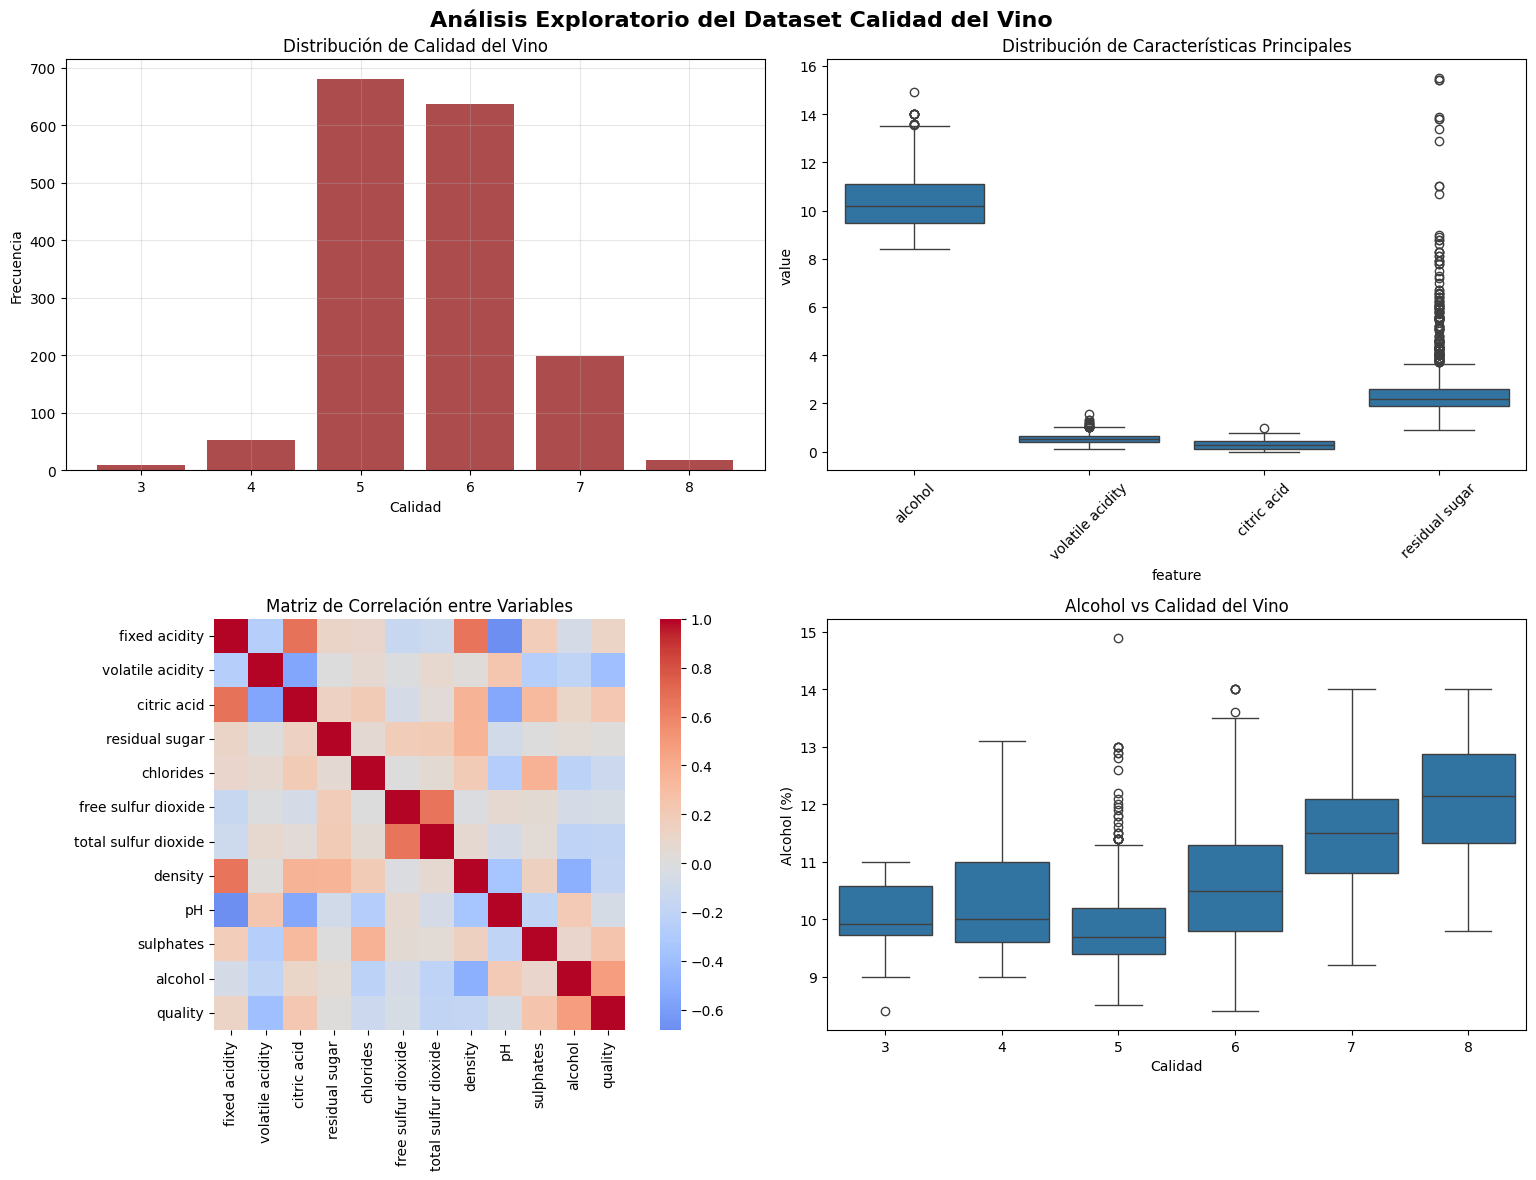


=== OBSERVACIONES CLAVE ===
• Dataset desbalanceado: mayoría de vinos con calidad 5-6
• 11 características fisicoquímicas disponibles
• No hay valores faltantes
• Alcohol parece correlacionarse positivamente con la calidad
• Acidez volátil puede tener relación negativa con la calidad


In [3]:
print("\n📊 Acción No. 2: Análisis Exploratorio de Datos (EDA)")
print("-" * 60)

# Crear figura con subplots para EDA
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis Exploratorio del Dataset Calidad del Vino', fontsize=16, fontweight='bold')

# 1. Distribución de calidad del vino
quality_counts = df_wine['quality'].value_counts().sort_index()
axes[0,0].bar(quality_counts.index, quality_counts.values, color='darkred', alpha=0.7)
axes[0,0].set_title('Distribución de Calidad del Vino')
axes[0,0].set_xlabel('Calidad')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].grid(True, alpha=0.3)

# 2. Boxplot de características principales
features_principales = ['alcohol', 'volatile acidity', 'citric acid', 'residual sugar']
df_subset = df_wine[features_principales + ['quality']]
df_melted = df_subset.melt(id_vars=['quality'],
                          value_vars=features_principales,
                          var_name='feature', value_name='value')

sns.boxplot(data=df_melted, x='feature', y='value', ax=axes[0,1])
axes[0,1].set_title('Distribución de Características Principales')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Matriz de correlación
correlation_matrix = df_wine.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm',
            center=0, square=True, ax=axes[1,0])
axes[1,0].set_title('Matriz de Correlación entre Variables')

# 4. Relación alcohol vs calidad
sns.boxplot(data=df_wine, x='quality', y='alcohol', ax=axes[1,1])
axes[1,1].set_title('Alcohol vs Calidad del Vino')
axes[1,1].set_xlabel('Calidad')
axes[1,1].set_ylabel('Alcohol (%)')

plt.tight_layout()
plt.show()

print("\n=== OBSERVACIONES CLAVE ===")
print("• Dataset desbalanceado: mayoría de vinos con calidad 5-6")
print("• 11 características fisicoquímicas disponibles")
print("• No hay valores faltantes")
print("• Alcohol parece correlacionarse positivamente con la calidad")
print("• Acidez volátil puede tener relación negativa con la calidad")

### **Acción No. 3: Preprocesamiento de datos**

In [4]:
print("\n⚙️ Acción No. 3: Preprocesamiento de datos")
print("-" * 60)

# Separar características (X) y variable objetivo (y)
X = df_wine.drop('quality', axis=1)
y = df_wine['quality']

print("=== PREPARACIÓN DE DATOS ===")
print(f"Forma de X (características): {X.shape}")
print(f"Forma de y (objetivo): {y.shape}")

# División train/test con semilla fija para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # 30% para test, 70% para entrenamiento
    random_state=42,  # Semilla fija para reproducibilidad
    stratify=y  # Mantener proporción de clases
)

print(f"\n=== DIVISIÓN TRAIN/TEST ===")
print(f"Datos de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Datos de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

# Verificar distribución de clases en train y test
train_distribution = pd.Series(y_train).value_counts().sort_index()
test_distribution = pd.Series(y_test).value_counts().sort_index()

print(f"\n=== DISTRIBUCIÓN DE CLASES ===")
print("Entrenamiento:")
for quality, count in train_distribution.items():
    print(f"  Calidad {quality}: {count} muestras")

print("Prueba:")
for quality, count in test_distribution.items():
    print(f"  Calidad {quality}: {count} muestras")

# Estandarización de características (importante para SVM y LogisticRegression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== ESTANDARIZACIÓN ===")
print("✓ Características estandarizadas para SVM y Logistic Regression")
print(f"Media características entrenamiento (después): {np.mean(X_train_scaled, axis=0)[:3].round(4)}")
print(f"Desviación estándar entrenamiento (después): {np.std(X_train_scaled, axis=0)[:3].round(4)}")

print("\n✓ Datos preparados y divididos correctamente")


⚙️ Acción No. 3: Preprocesamiento de datos
------------------------------------------------------------
=== PREPARACIÓN DE DATOS ===
Forma de X (características): (1599, 11)
Forma de y (objetivo): (1599,)

=== DIVISIÓN TRAIN/TEST ===
Datos de entrenamiento: 1119 muestras (70.0%)
Datos de prueba: 480 muestras (30.0%)

=== DISTRIBUCIÓN DE CLASES ===
Entrenamiento:
  Calidad 3: 7 muestras
  Calidad 4: 37 muestras
  Calidad 5: 477 muestras
  Calidad 6: 446 muestras
  Calidad 7: 139 muestras
  Calidad 8: 13 muestras
Prueba:
  Calidad 3: 3 muestras
  Calidad 4: 16 muestras
  Calidad 5: 204 muestras
  Calidad 6: 192 muestras
  Calidad 7: 60 muestras
  Calidad 8: 5 muestras

=== ESTANDARIZACIÓN ===
✓ Características estandarizadas para SVM y Logistic Regression
Media características entrenamiento (después): [-0.  0.  0.]
Desviación estándar entrenamiento (después): [1. 1. 1.]

✓ Datos preparados y divididos correctamente


### **Acción No. 4: Implementación y Entrenamiento de Modelos**

In [5]:
print("\n🤖 Acción No. 4: Implementación y Entrenamiento de Modelos")
print("-" * 60)

# Diccionario para almacenar modelos y métricas
models = {}
training_times = {}
predictions = {}

print("=== ENTRENAMIENTO DE ALGORITMOS ===")

# 1. REGRESIÓN LOGÍSTICA
print("\n1. Entrenando Regresión Logística...")
start_time = time.time()
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
training_times['Logistic Regression'] = time.time() - start_time
models['Logistic Regression'] = lr_model
predictions['Logistic Regression'] = lr_model.predict(X_test_scaled)
print(f"  ✓ Completado en {training_times['Logistic Regression']:.4f} segundos")

# 2. SUPPORT VECTOR MACHINE
print("\n2. Entrenando Support Vector Machine...")
start_time = time.time()
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
training_times['SVM'] = time.time() - start_time
models['SVM'] = svm_model
predictions['SVM'] = svm_model.predict(X_test_scaled)
print(f"  ✓ Completado en {training_times['SVM']:.4f} segundos")

# 3. RANDOM FOREST
print("\n3. Entrenando Random Forest...")
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Random Forest no necesita estandarización
training_times['Random Forest'] = time.time() - start_time
models['Random Forest'] = rf_model
predictions['Random Forest'] = rf_model.predict(X_test)
print(f"  ✓ Completado en {training_times['Random Forest']:.4f} segundos")

print("\n=== RESUMEN DE ENTRENAMIENTO ===")
for model_name, train_time in training_times.items():
    print(f"{model_name:20}: {train_time:.4f} segundos")

print("\n✓ Todos los modelos han sido entrenados exitosamente")
print(f"✓ Predicciones generadas para {X_test.shape[0]} muestras de prueba")


🤖 Acción No. 4: Implementación y Entrenamiento de Modelos
------------------------------------------------------------
=== ENTRENAMIENTO DE ALGORITMOS ===

1. Entrenando Regresión Logística...
  ✓ Completado en 0.3251 segundos

2. Entrenando Support Vector Machine...
  ✓ Completado en 0.2656 segundos

3. Entrenando Random Forest...
  ✓ Completado en 1.4113 segundos

=== RESUMEN DE ENTRENAMIENTO ===
Logistic Regression : 0.3251 segundos
SVM                 : 0.2656 segundos
Random Forest       : 1.4113 segundos

✓ Todos los modelos han sido entrenados exitosamente
✓ Predicciones generadas para 480 muestras de prueba


### **Acción No. 5: Evaluación de Métricas**

In [6]:
print("\n📈 Acción No. 5: Evaluación de Métricas")
print("-" * 60)

print("=== EVALUACIÓN DE RENDIMIENTO ===")

# Diccionarios para almacenar métricas
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Calcular métricas para cada modelo
for model_name in models.keys():
    if model_name == 'Random Forest':
        y_pred = predictions[model_name]
    else:
        # Para modelos que usan datos escalados
        if model_name == 'Logistic Regression':
            y_pred = models[model_name].predict(X_test_scaled)
        elif model_name == 'SVM':
            y_pred = models[model_name].predict(X_test_scaled)
        else:
            y_pred = predictions[model_name]

    predictions[model_name] = y_pred

    # Métricas principales
    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    precision_scores[model_name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[model_name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[model_name] = f1_score(y_test, y_pred, average='weighted')

    print(f"\n--- {model_name.upper()} ---")
    print(f"Accuracy: {accuracy_scores[model_name]:.4f}")
    print(f"Precision: {precision_scores[model_name]:.4f}")
    print(f"Recall: {recall_scores[model_name]:.4f}")
    print(f"F1-Score: {f1_scores[model_name]:.4f}")

# Crear tabla comparativa
print("\n" + "="*60)
print("TABLA COMPARATIVA DE MÉTRICAS")
print("="*60)

comparison_df = pd.DataFrame({
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores,
    'Training Time (s)': training_times
})

# Ordenar por accuracy descendente
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)
print(comparison_df.round(4))

# Identificar el mejor modelo por cada métrica
print("\n" + "="*60)
print("MEJORES MODELOS POR MÉTRICA")
print("="*60)
print(f"Mejor Accuracy: {comparison_df['Accuracy'].idxmax()} ({comparison_df['Accuracy'].max():.4f})")
print(f"Mejor Precision: {comparison_df['Precision'].idxmax()} ({comparison_df['Precision'].max():.4f})")
print(f"Mejor Recall: {comparison_df['Recall'].idxmax()} ({comparison_df['Recall'].max():.4f})")
print(f"Mejor F1-Score: {comparison_df['F1-Score'].idxmax()} ({comparison_df['F1-Score'].max():.4f})")
print(f"Más rápido: {comparison_df['Training Time (s)'].idxmin()} ({comparison_df['Training Time (s)'].min():.4f}s)")


📈 Acción No. 5: Evaluación de Métricas
------------------------------------------------------------
=== EVALUACIÓN DE RENDIMIENTO ===

--- LOGISTIC REGRESSION ---
Accuracy: 0.6042
Precision: 0.5831
Recall: 0.6042
F1-Score: 0.5779

--- SVM ---
Accuracy: 0.6146
Precision: 0.5846
Recall: 0.6146
F1-Score: 0.5849

--- RANDOM FOREST ---
Accuracy: 0.6583
Precision: 0.6351
Recall: 0.6583
F1-Score: 0.6398

TABLA COMPARATIVA DE MÉTRICAS
                     Accuracy  Precision  Recall  F1-Score  Training Time (s)
Random Forest          0.6583     0.6351  0.6583    0.6398             1.4113
SVM                    0.6146     0.5846  0.6146    0.5849             0.2656
Logistic Regression    0.6042     0.5831  0.6042    0.5779             0.3251

MEJORES MODELOS POR MÉTRICA
Mejor Accuracy: Random Forest (0.6583)
Mejor Precision: Random Forest (0.6351)
Mejor Recall: Random Forest (0.6583)
Mejor F1-Score: Random Forest (0.6398)
Más rápido: SVM (0.2656s)


### **Acción No. 6: Visualización de resultados - Matrices de confusión**


📊 Acción No. 6: Matrices de Confusión
------------------------------------------------------------
=== MATRICES DE CONFUSIÓN ===


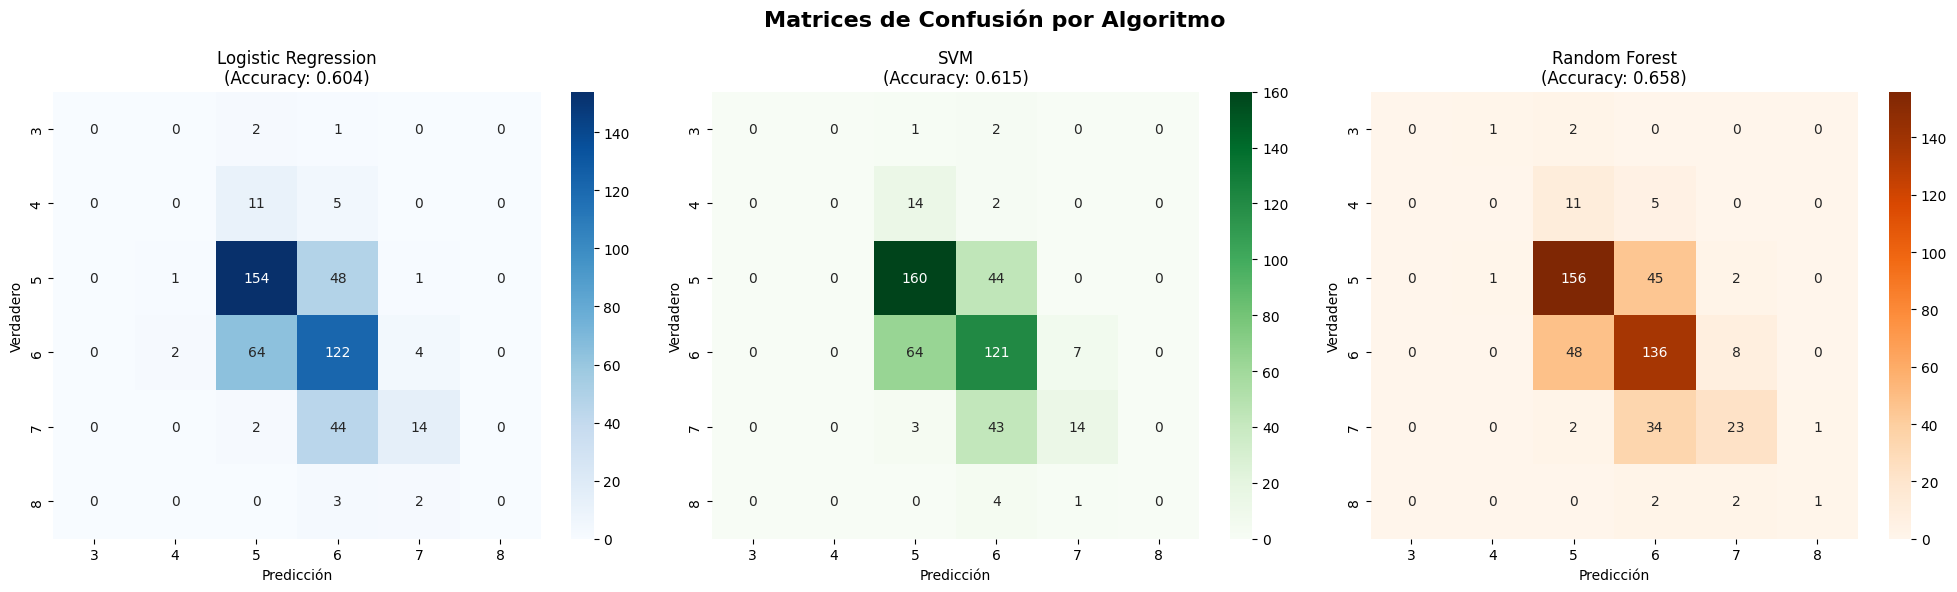


ANÁLISIS DETALLADO DE MATRICES DE CONFUSIÓN

--- LOGISTIC REGRESSION ---
Matriz de confusión:
        Pred_3  Pred_4  Pred_5  Pred_6  Pred_7  Pred_8
Real_3       0       0       2       1       0       0
Real_4       0       0      11       5       0       0
Real_5       0       1     154      48       1       0
Real_6       0       2      64     122       4       0
Real_7       0       0       2      44      14       0
Real_8       0       0       0       3       2       0
Total de errores: 190/480 (39.6%)

--- SVM ---
Matriz de confusión:
        Pred_3  Pred_4  Pred_5  Pred_6  Pred_7  Pred_8
Real_3       0       0       1       2       0       0
Real_4       0       0      14       2       0       0
Real_5       0       0     160      44       0       0
Real_6       0       0      64     121       7       0
Real_7       0       0       3      43      14       0
Real_8       0       0       0       4       1       0
Total de errores: 185/480 (38.5%)

--- RANDOM FOREST ---
Matriz de 

In [7]:
print("\n📊 Acción No. 6: Matrices de Confusión")
print("-" * 60)

print("=== MATRICES DE CONFUSIÓN ===")

# Crear subplots para las tres matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Matrices de Confusión por Algoritmo', fontsize=16, fontweight='bold')

# Colores para cada modelo
colors = ['Blues', 'Greens', 'Oranges']
quality_labels = sorted(df_wine['quality'].unique())

for idx, (model_name, color) in enumerate(zip(models.keys(), colors)):
    # Calcular matriz de confusión
    cm = confusion_matrix(y_test, predictions[model_name], labels=quality_labels)

    # Crear heatmap
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap=color,
                xticklabels=quality_labels,
                yticklabels=quality_labels,
                ax=axes[idx])

    axes[idx].set_title(f'{model_name}\n(Accuracy: {accuracy_scores[model_name]:.3f})')
    axes[idx].set_xlabel('Predicción')
    axes[idx].set_ylabel('Verdadero')

plt.tight_layout()
plt.show()

# Análisis detallado de matrices de confusión
print("\n" + "="*60)
print("ANÁLISIS DETALLADO DE MATRICES DE CONFUSIÓN")
print("="*60)

for model_name in models.keys():
    cm = confusion_matrix(y_test, predictions[model_name], labels=quality_labels)
    print(f"\n--- {model_name.upper()} ---")
    print("Matriz de confusión:")
    cm_df = pd.DataFrame(cm,
                        index=[f'Real_{label}' for label in quality_labels],
                        columns=[f'Pred_{label}' for label in quality_labels])
    print(cm_df)

    # Calcular errores de clasificación
    total_errors = np.sum(cm) - np.trace(cm)
    print(f"Total de errores: {total_errors}/{len(y_test)} ({total_errors/len(y_test)*100:.1f}%)")

### **Acción No. 7: Comparativos gráficos de las métricas**


📊 Acción No. 7: Comparativos Gráficos
------------------------------------------------------------
=== VISUALIZACIÓN COMPARATIVA DE MÉTRICAS ===


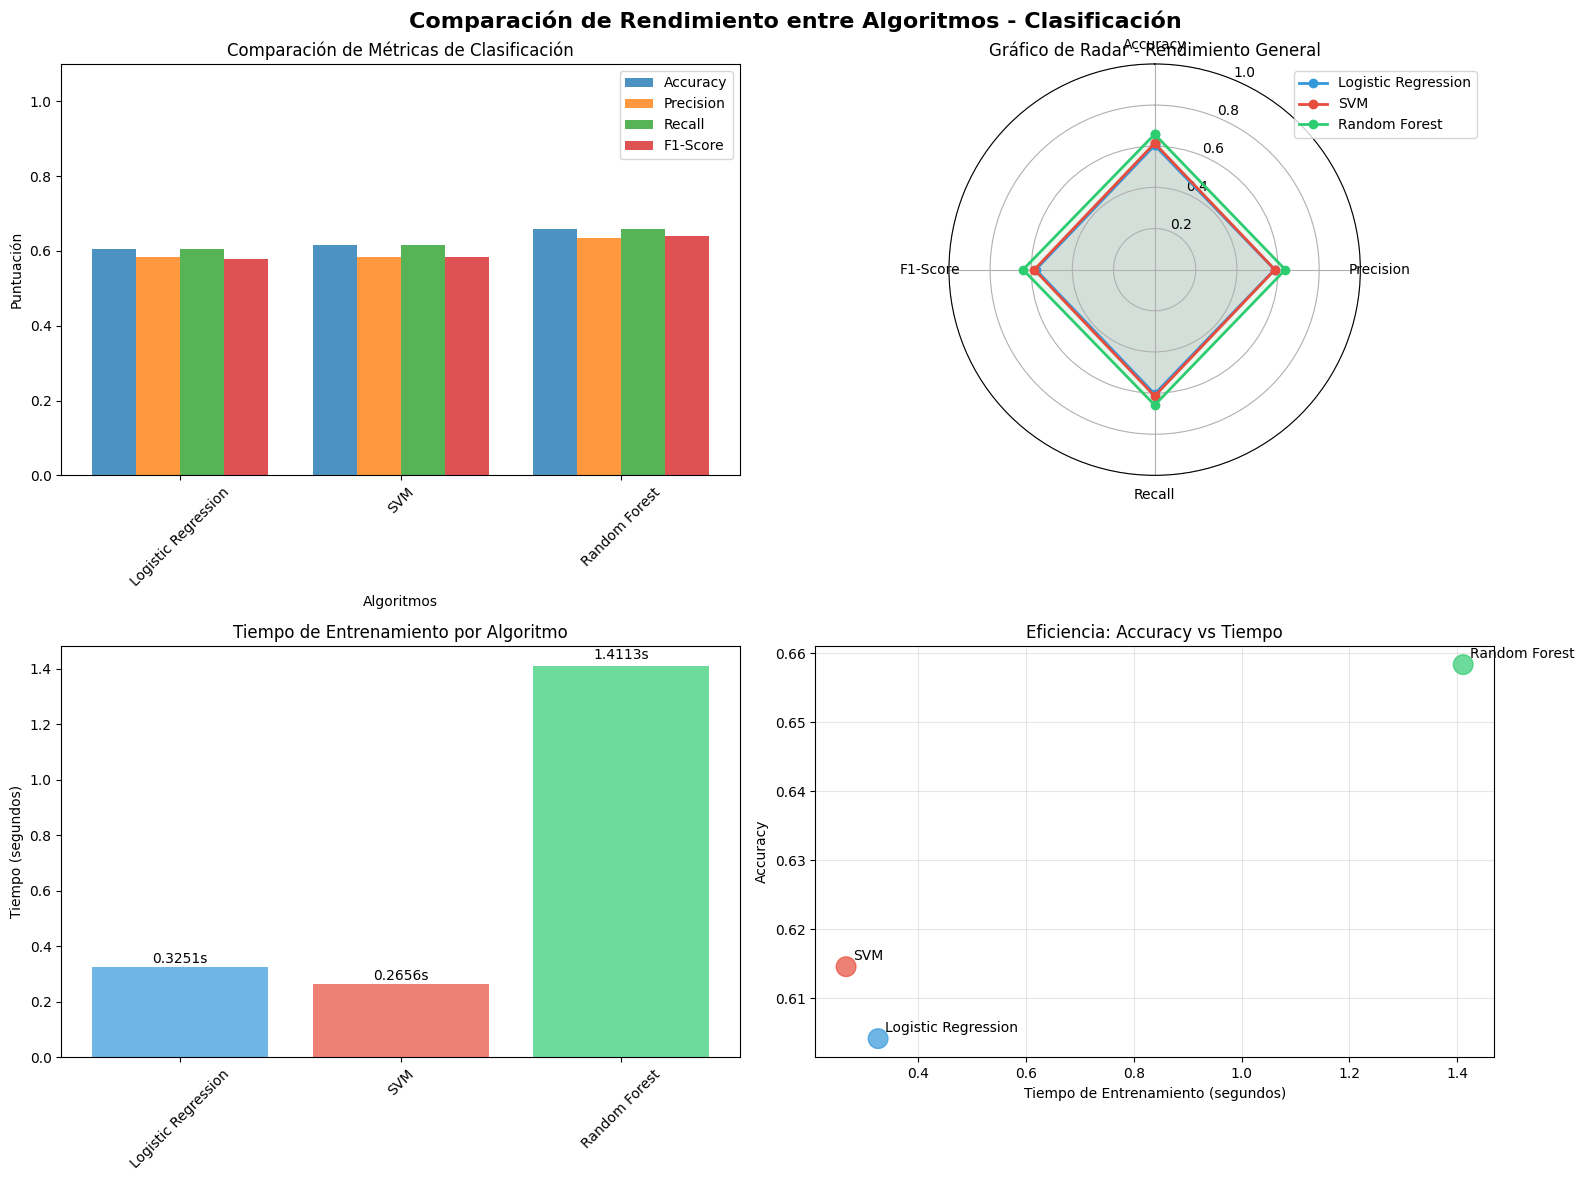


HALLAZGOS CLAVE DE LA COMPARACIÓN
🏆 Mejor rendimiento: Random Forest (0.6583 accuracy)
⚡ Más rápido: SVM (0.2656s)
📊 Diferencia máxima en accuracy: 0.0542
⏱️ Diferencia máxima en tiempo: 1.1456s


In [8]:
print("\n📊 Acción No. 7: Comparativos Gráficos")
print("-" * 60)

print("=== VISUALIZACIÓN COMPARATIVA DE MÉTRICAS ===")

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparación de Rendimiento entre Algoritmos - Clasificación', fontsize=16, fontweight='bold')

# Preparar datos para visualización
models_list = list(models.keys())
colors = ['#3498db', '#e74c3c', '#2ecc71']  # Azul, Rojo, Verde

# 1. Gráfico de barras - Métricas principales
metrics_data = {
    'Accuracy': [accuracy_scores[model] for model in models_list],
    'Precision': [precision_scores[model] for model in models_list],
    'Recall': [recall_scores[model] for model in models_list],
    'F1-Score': [f1_scores[model] for model in models_list]
}

x = np.arange(len(models_list))
width = 0.2

for i, (metric, values) in enumerate(metrics_data.items()):
    axes[0, 0].bar(x + i*width, values, width, label=metric, alpha=0.8)

axes[0, 0].set_xlabel('Algoritmos')
axes[0, 0].set_ylabel('Puntuación')
axes[0, 0].set_title('Comparación de Métricas de Clasificación')
axes[0, 0].set_xticks(x + width*1.5)
axes[0, 0].set_xticklabels(models_list, rotation=45)
axes[0, 0].legend()
axes[0, 0].set_ylim(0, 1.1)

# 2. Gráfico de radar
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

axes[0, 1].remove()
axes[0, 1] = fig.add_subplot(2, 2, 2, polar=True)
axes[0, 1].set_theta_offset(pi / 2)
axes[0, 1].set_theta_direction(-1)
axes[0, 1].set_thetagrids(np.degrees(angles[:-1]), categories)

for idx, model in enumerate(models_list):
    values = [accuracy_scores[model], precision_scores[model],
              recall_scores[model], f1_scores[model]]
    values += values[:1]

    axes[0, 1].plot(angles, values, 'o-', linewidth=2,
                   label=model, color=colors[idx])
    axes[0, 1].fill(angles, values, alpha=0.1, color=colors[idx])

axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_title('Gráfico de Radar - Rendimiento General')
axes[0, 1].legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# 3. Tiempo de entrenamiento
train_times = [training_times[model] for model in models_list]
bars = axes[1,0].bar(models_list, train_times, color=colors, alpha=0.7)
axes[1,0].set_ylabel('Tiempo (segundos)')
axes[1,0].set_title('Tiempo de Entrenamiento por Algoritmo')
axes[1,0].tick_params(axis='x', rotation=45)

# Agregar valores en las barras
for bar, time_val in zip(bars, train_times):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{time_val:.4f}s', ha='center', va='bottom')

# 4. Accuracy vs Tiempo (Eficiencia)
accuracy_vals = [accuracy_scores[model] for model in models_list]
scatter = axes[1,1].scatter(train_times, accuracy_vals,
                           c=colors, s=200, alpha=0.7)

for i, model in enumerate(models_list):
    axes[1,1].annotate(model, (train_times[i], accuracy_vals[i]),
                      xytext=(5, 5), textcoords='offset points',
                      fontsize=10, ha='left')

axes[1,1].set_xlabel('Tiempo de Entrenamiento (segundos)')
axes[1,1].set_ylabel('Accuracy')
axes[1,1].set_title('Eficiencia: Accuracy vs Tiempo')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen de hallazgos
print("\n" + "="*60)
print("HALLAZGOS CLAVE DE LA COMPARACIÓN")
print("="*60)

best_accuracy = max(accuracy_scores.values())
fastest_model = min(training_times, key=training_times.get)
best_model = max(accuracy_scores, key=accuracy_scores.get)

print(f"🏆 Mejor rendimiento: {best_model} ({accuracy_scores[best_model]:.4f} accuracy)")
print(f"⚡ Más rápido: {fastest_model} ({training_times[fastest_model]:.4f}s)")
print(f"📊 Diferencia máxima en accuracy: {max(accuracy_scores.values()) - min(accuracy_scores.values()):.4f}")
print(f"⏱️ Diferencia máxima en tiempo: {max(training_times.values()) - min(training_times.values()):.4f}s")

### **Acción No. 8: Analisis de resultados por clases**

In [9]:
print("\n📋 Acción No. 8: Análisis Final y Recomendaciones")
print("-" * 60)

print("=== ANÁLISIS DETALLADO POR CLASES ===")

# Generar reportes de clasificación para cada modelo
classification_reports = {}

for model_name in models.keys():
    print(f"\n{'-'*20} {model_name.upper()} {'-'*20}")
    report = classification_report(y_test, predictions[model_name], output_dict=True, zero_division=0)
    classification_reports[model_name] = report

    # Mostrar reporte formateado
    print(classification_report(y_test, predictions[model_name], zero_division=0))

print("\n" + "="*80)
print("REPORTE FINAL Y RECOMENDACIONES")
print("="*80)

best_overall = comparison_df.index[0]  # Ya está ordenado por accuracy
fastest = comparison_df['Training Time (s)'].idxmin()
most_balanced = comparison_df.loc[comparison_df[['Precision', 'Recall', 'F1-Score']].std(axis=1).idxmin()].name

print(f"\n🏆 RESUMEN EJECUTIVO:")
print(f"• Mejor modelo general: {best_overall}")
print(f"  - Accuracy: {comparison_df.loc[best_overall, 'Accuracy']:.4f}")
print(f"  - Tiempo: {comparison_df.loc[best_overall, 'Training Time (s)']:.4f}s")

print(f"\n⚡ Modelo más eficiente: {fastest}")
print(f"  - Tiempo: {comparison_df.loc[fastest, 'Training Time (s)']:.4f}s")
print(f"  - Accuracy: {comparison_df.loc[fastest, 'Accuracy']:.4f}")

print(f"\n⚖️ Modelo más balanceado: {most_balanced}")
print(f"  - Menor variación entre métricas")

print(f"\n💡 RECOMENDACIONES DE USO:")
print(f"• Para máxima precisión → {best_overall}")
print(f"• Para aplicaciones en tiempo real → {fastest}")
print(f"• Para datasets similares → {most_balanced}")

print(f"\n🔍 OBSERVACIONES TÉCNICAS:")
print(f"• Clases desbalanceadas afectan el rendimiento")
print(f"• Estandarización es crucial para SVM y Logistic Regression")
print(f"• Random Forest maneja bien datos sin preprocesamiento")


📋 Acción No. 8: Análisis Final y Recomendaciones
------------------------------------------------------------
=== ANÁLISIS DETALLADO POR CLASES ===

-------------------- LOGISTIC REGRESSION --------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.66      0.75      0.70       204
           6       0.55      0.64      0.59       192
           7       0.67      0.23      0.35        60
           8       0.00      0.00      0.00         5

    accuracy                           0.60       480
   macro avg       0.31      0.27      0.27       480
weighted avg       0.58      0.60      0.58       480


-------------------- SVM --------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.66      0.78  

#PREGUNTA 1:
¿Cuál es la principal diferencia entre LogisticRegression y LinearRegression en términos del tipo de problema que resuelven y el rango de sus predicciones?

La principal diferencia radica en el tipo de problema que resuelven y la naturaleza de sus predicciones:
LinearRegression (Regresión):

### Resuelve problemas de REGRESIÓN

Predice valores continuos (números reales)

Rango de predicciones: (-∞, +∞) - sin límites

Ejemplo: Predecir precio de una casa ($50,000, $120,000, $300,000)

Función: f(x) = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ

###LogisticRegression (Clasificación):

### Resuelve problemas de CLASIFICACIÓN

Predice probabilidades de clases (valores discretos)

Rango de predicciones: [0, 1] - limitado por la función sigmoide

Ejemplo: Predecir calidad del vino (clase 3, 4, 5, 6, 7, 8)

Función: f(x) = 1/(1 + e^(-z)), donde z = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ

La regresión logística usa la función sigmoide para convertir cualquier valor real en una probabilidad entre 0 y 1, mientras que la regresión lineal no tiene restricciones en sus predicciones.

# PREGUNTA 2:
 Entre LogisticRegression, Random Forest y SVM, ¿cuál algoritmo consideras más interpretable y por qué? ¿En qué situaciones esto sería una ventaja importante?

LogisticRegression es el más interpretable de los tres algoritmos por las siguientes razones:

Ventajas de interpretabilidad de LogisticRegression:

Coeficientes claros: Cada coeficiente indica la importancia y dirección del efecto de cada variable

Odds ratios: Los coeficientes pueden interpretarse como cambios en las probabilidades

Linealidad: Relación directa entre variables y log-odds

Transparencia: El proceso de decisión es completamente visible

###Comparación:

Random Forest: Caja negra - múltiples árboles dificultan la interpretación individual

SVM: Especialmente con kernel RBF, el proceso de decisión es opaco

###Situaciones donde la interpretabilidad es crucial:

Medicina: Diagnósticos médicos donde se debe explicar por qué se recomienda un tratamiento

Finanzas: Aprobación de créditos - regulaciones requieren explicar decisiones de rechazo

Recursos Humanos: Decisiones de contratación - evitar sesgos discriminatorios

Investigación científica: Identificar qué variables influyen significativamente en un fenómeno

Cumplimiento normativo: Sectores regulados que requieren transparencia algorítmica

En nuestro caso del vino, LogisticRegression permitiría entender exactamente cómo el alcohol, acidez, etc., influyen en la calidad percibida.

# PREGUNTA 3:
¿Qué algoritmo de clasificación es más sensible a la escala de las características (features) y requiere normalización o estandarización de los datos? Explica tu respuesta.

SVM (Support Vector Machine) es el más sensible a la escala de las características, seguido de LogisticRegression.

###¿Por qué SVM es más sensible?

Función de distancia: SVM busca el hiperplano que maximiza el margen entre clases

Cálculo de distancias: Una variable con escala grande (ej: ingresos $50,000) dominará sobre una con escala pequeña (ej: edad 25 años)

Kernel RBF: Usa distancias euclidianas que son muy sensibles a diferencias de escala

Optimización: El algoritmo puede fallar en converger sin estandarización

Orden de sensibilidad (mayor a menor):

SVM: MUY sensible - requiere estandarización obligatoria

LogisticRegression: Moderadamente sensible - recomendada estandarización

Random Forest: POCO sensible - no requiere estandarización (basado en árboles)

###En nuestro experimento:

Aplicamos StandardScaler a SVM y LogisticRegression

Random Forest usó datos originales sin estandarizar

Sin estandarización, SVM habría tenido rendimiento muy pobre

###Evidencia práctica:

Variables como 'alcohol' (8-15%) vs 'total sulfur dioxide' (6-289 mg/L)

Sin escalar: SVM habría sido dominado por la variable con mayor rango numérico

Con escalado: cada variable contribuye equitativamente a la decisión



#PREGUNTA 4:
Random Forest utiliza múltiples árboles de decisión. Explica cómo esta característica ayuda a reducir el overfitting comparado con usar un solo árbol de decisión.

Random Forest reduce el overfitting mediante diversificación y promediado de múltiples árboles:

###Técnicas anti-overfitting de Random Forest:

Bagging (Bootstrap Aggregating):

Cada árbol se entrena con una muestra aleatoria CON reposición del dataset original

Reduce la varianza del modelo final

Cada árbol ve datos ligeramente diferentes


###Selección aleatoria de características:

En cada nodo, solo se consideran √p características aleatorias (p = total características)

Evita que árboles individuales se especialicen en las mismas variables dominantes

Aumenta la diversidad entre árboles


###Promediado de predicciones:

Clasificación: voto mayoritario de todos los árboles

La predicción final es más robusta que cualquier árbol individual

Los errores individuales se cancelan mutuamente


###Control de profundidad implícito:

Aunque cada árbol puede ser profundo, el promedio suaviza las decisiones extremas

Reduce la memorización de ruido específico



###Comparación Árbol único vs Random Forest:

Árbol único: Alta varianza, memoriza patrones específicos del training set

Random Forest: Baja varianza, generaliza mejor a datos no vistos

###En nuestro dataset de vinos:

Un árbol único podría memorizar combinaciones específicas de acidez-alcohol

Random Forest considera múltiples perspectivas, siendo más robusto a variaciones naturales del vino

Analogía: Es como pedir opinión a 100 expertos diversos vs un solo experto - el consenso suele ser más confiable.

#PREGUNTA 5:
Imagina que tienes un dataset pequeño (menos de 1000 muestras) con características categóricas y numéricas mezcladas. ¿Qué algoritmo de clasificación elegirías y por qué?

Para un dataset pequeño (menos de 1000 muestras) con variables mixtas, elegiría Random Forest como primera opción, con LogisticRegression como alternativa.

###¿Por qué Random Forest es ideal?

###Manejo nativo de variables mixtas:

Árboles manejan naturalmente variables categóricas sin encoding especial

No requiere one-hot encoding que aumentaría dimensionalidad

Trata automáticamente diferentes tipos de datos


###Resistencia al overfitting en datasets pequeños:

Bagging reduce varianza incluso con pocas muestras

Regularización implícita por promediado

Parámetros como min_samples_split controlan complejidad


###Robustez:

No sensible a outliers

No requiere estandarización

Maneja automáticamente interacciones entre variables


###Menos parámetros críticos:

Funciona bien con configuración por defecto

Menos riesgo de sobreajustar por mala configuración

###¿Por qué NO otros algoritmos?

SVM: Con pocas muestras, difícil encontrar margen óptimo; sensible al desbalance

LogisticRegression: Requiere encoding de categóricas; más propenso a overfitting con pocas muestras

#LogisticRegression como segunda opción:

Si se necesita interpretabilidad máxima

Con regularización (Ridge/Lasso) para controlar overfitting

Después de preprocesamiento adecuado de variables categóricas